### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob

### Impoting only CSV files 

In [6]:
glob.glob(r"/Users/akhilkumarkolli/individual_stocks_5yr/*csv")

['/Users/akhilkumarkolli/individual_stocks_5yr/XRX_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/GS_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/SPGI_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/MTB_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/V_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/CTAS_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/ESRX_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/APH_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/BBT_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/RHI_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/GGP_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/HCA_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/HD_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/PEP_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/INTC_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/MAC_data.csv',
 '/Users

In [9]:
company_list = [ r'/Users/akhilkumarkolli/individual_stocks_5yr/AMZN_data.csv',
                r'/Users/akhilkumarkolli/individual_stocks_5yr/AAPL_data.csv',
                r'/Users/akhilkumarkolli/individual_stocks_5yr/GOOG_data.csv',
                r'/Users/akhilkumarkolli/individual_stocks_5yr/MSFT_data.csv']


In [24]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data,current_df], ignore_index = True)
    # com_data = pd.append[all_data, current_df, ignore_index=True]

In [31]:
all_data['Name'].unique()

array(['AMZN', 'AAPL', 'GOOG', 'MSFT'], dtype=object)

### Change in Price Over time

In [36]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [37]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

### We have Incorrect format for data feature

In [39]:
all_data['date']=pd.to_datetime(all_data['date'])

In [90]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [41]:
tech_list = all_data['Name'].unique()

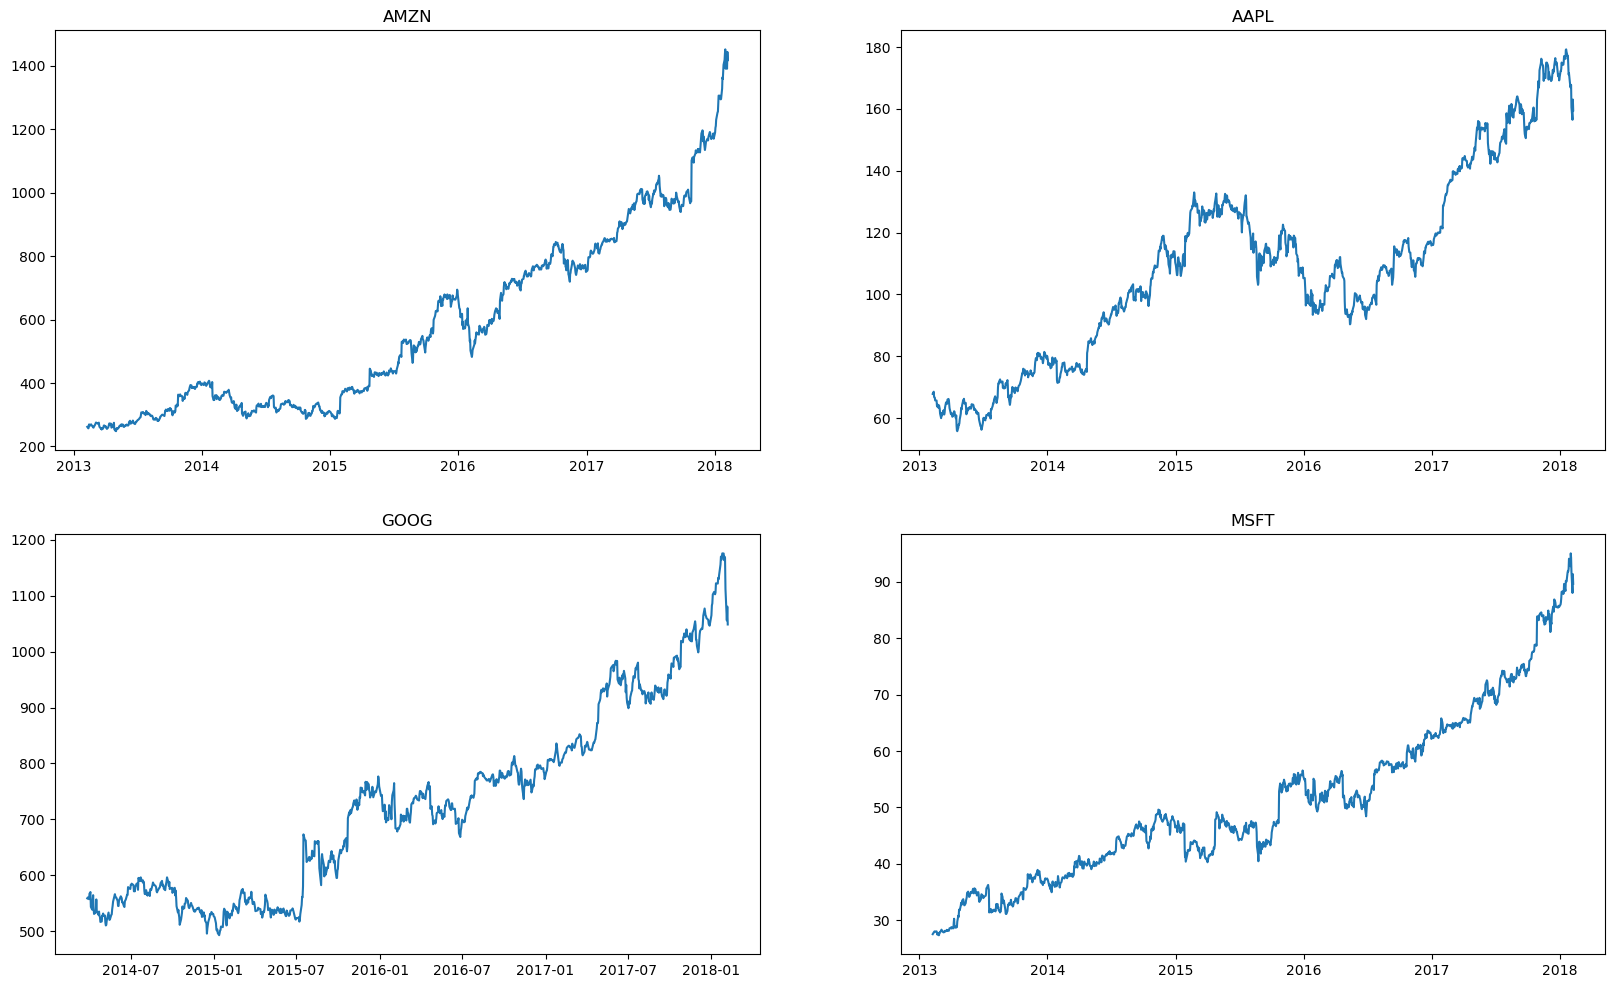

In [62]:
plt.figure(figsize=(20, 12)) 

for index ,company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)


### Analysing moving average of the various stocks

In [63]:
all_data.head(15)

date    open     high      low   close   volume  Name
0  2013-02-08  261.40  265.250  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.250  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.160  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.960  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.650  265.400  269.24  3462780  AMZN
5  2013-02-15  267.63  268.920  263.110  265.09  3979832  AMZN
6  2013-02-19  265.91  270.110  264.500  269.75  2853752  AMZN
7  2013-02-20  270.20  274.300  266.371  266.41  3528862  AMZN
8  2013-02-21  265.12  269.480  263.250  265.94  3637396  AMZN
9  2013-02-22  266.62  267.110  261.610  265.42  3123402  AMZN
10 2013-02-25  266.94  268.694  259.650  259.87  3032109  AMZN
11 2013-02-26  260.89  262.040  255.730  259.36  3348011  AMZN
12 2013-02-27  259.40  265.830  256.860  263.25  2908010  AMZN
13 2013-02-28  261.81  267.000  260.630  264.27  2667199  AMZN
14 2013-03-01  263.27  266.600  261.040  265.74  2956724  AMZN

In [67]:
all_data['close'].rolling(window = 10).mean().head(14)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     264.918
10    264.710
11    264.925
12    265.380
13    264.860
Name: close, dtype: float64

In [98]:
new_data = all_data.copy()
new_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [99]:
my_day = [10,30,50]

for ma in my_day:
    new_data[f'close_{ma}'] = new_data['close'].rolling(window=ma).mean()
    

In [104]:
new_data.tail(20)

date    open    high      low  close    volume  Name  close_10  \
4732 2018-01-10  87.860  88.190  87.4100  87.82  18652201  MSFT    86.889   
4733 2018-01-11  88.130  88.130  87.2400  88.08  17808877  MSFT    87.126   
4734 2018-01-12  88.670  89.780  88.4500  89.60  24271531  MSFT    87.514   
4735 2018-01-16  90.100  90.790  88.0104  88.35  36599736  MSFT    87.795   
4736 2018-01-17  89.080  90.280  88.7500  90.14  25621164  MSFT    88.214   
4737 2018-01-18  89.800  90.670  89.6600  90.10  24159683  MSFT    88.589   
4738 2018-01-19  90.140  90.610  89.6600  90.00  36875013  MSFT    88.878   
4739 2018-01-22  90.000  91.620  89.7400  91.61  23601555  MSFT    89.220   
4740 2018-01-23  91.900  92.300  91.5400  91.90  23412841  MSFT    89.582   
4741 2018-01-24  92.550  93.430  91.5800  91.82  33277483  MSFT    89.942   
4742 2018-01-25  92.465  93.240  91.9300  92.33  26383238  MSFT    90.393   
4743 2018-01-26  93.120  94.060  92.5800  94.06  29172167  MSFT    90.991   
4744 2018-01-29  95.140  95.450  93.7200  93.92  31569940  MSFT    91.423   
4745 2018-01-30  93.300  93.660  92.1000  92.74  38635053  MSFT    91.862   
4746 2018-01-31  93.750  95.400  93.5100  95.01  48756338  MSFT    92.349   
4747 2018-02-01  94.790  96.070  93.5813  94.26  47227882  MSFT    92.765   
4748 2018-02-02  93.640  93.970  91.5000  91.78  47867753  MSFT    92.943   
4749 2018-02-05  90.560  93.240  88.0000  88.00  51031465  MSFT    92.582   
4750 2018-02-06  86.890  91.475  85.2500  91.33  67998564  MSFT    92.525   
4751 2018-02-07  90.490  91.770  89.2000  89.61  41107592  MSFT    92.304   

       close_30  close_50  
4732  85.316000   84.6446  
4733  85.422667   84.7284  
4734  85.631333   84.8568  
4735  85.770667   84.9602  
4736  85.966667   85.0820  
4737  86.267333   85.2012  
4738  86.547667   85.3118  
4739  86.842000   85.4586  
4740  87.155667   85.6054  
4741  87.411000   85.7600  
4742  87.647667   85.9292  
4743  87.930333   86.1318  
4744  88.216000   86.3292  
4745  88.484333   86.5244  
4746  88.756333   86.7606  
4747  89.019000   86.9978  
4748  89.217333   87.1828  
4749  89.300000   87.2684  
4750  89.494333   87.4328  
4751  89.631000   87.5598

In [112]:
new_data.set_index('date', inplace = True)

KeyError: "None of ['date'] are in the columns"

In [111]:
new_data

open     high       low   close    volume  Name  close_10  \
date                                                                      
2013-02-08  261.40  265.250  260.5550  261.95   3879078  AMZN       NaN   
2013-02-11  263.20  263.250  256.6000  257.21   3403403  AMZN       NaN   
2013-02-12  259.19  260.160  257.0000  258.70   2938660  AMZN       NaN   
2013-02-13  261.53  269.960  260.3000  269.47   5292996  AMZN       NaN   
2013-02-14  267.37  270.650  265.4000  269.24   3462780  AMZN       NaN   
...            ...      ...       ...     ...       ...   ...       ...   
2018-02-01   94.79   96.070   93.5813   94.26  47227882  MSFT    92.765   
2018-02-02   93.64   93.970   91.5000   91.78  47867753  MSFT    92.943   
2018-02-05   90.56   93.240   88.0000   88.00  51031465  MSFT    92.582   
2018-02-06   86.89   91.475   85.2500   91.33  67998564  MSFT    92.525   
2018-02-07   90.49   91.770   89.2000   89.61  41107592  MSFT    92.304   

             close_30  close_50  
date                             
2013-02-08        NaN       NaN  
2013-02-11        NaN       NaN  
2013-02-12        NaN       NaN  
2013-02-13        NaN       NaN  
2013-02-14        NaN       NaN  
...               ...       ...  
2018-02-01  89.019000   86.9978  
2018-02-02  89.217333   87.1828  
2018-02-05  89.300000   87.2684  
2018-02-06  89.494333   87.4328  
2018-02-07  89.631000   87.5598  

[4752 rows x 9 columns]

In [113]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_30', 'close_50'],
      dtype='object')

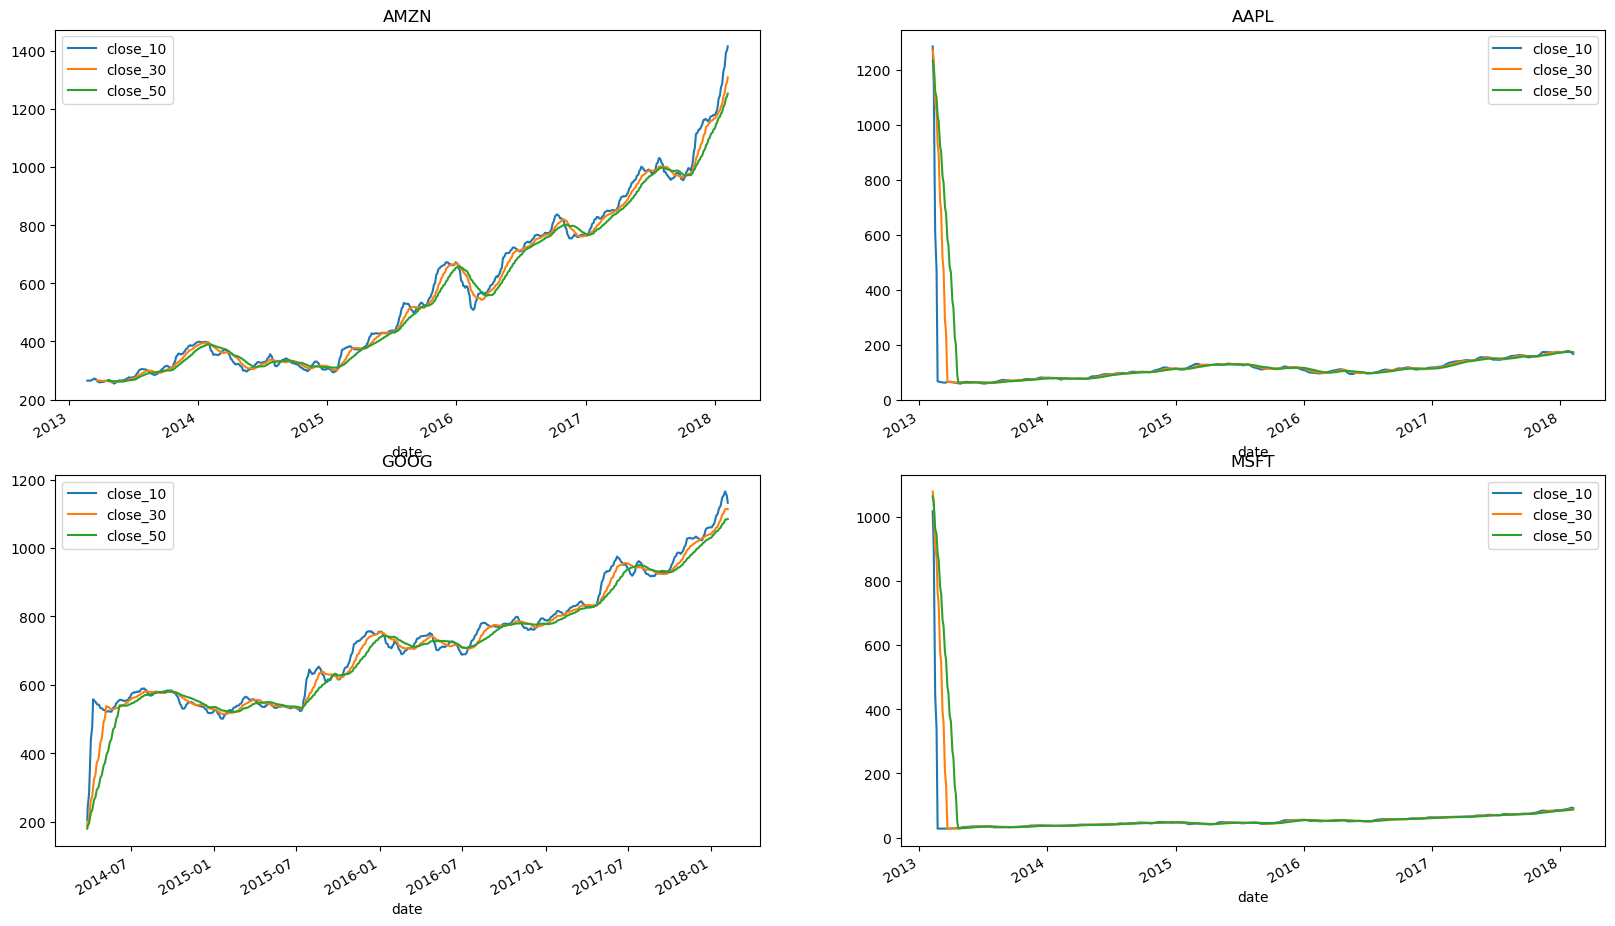

In [116]:
plt.figure(figsize=(20, 12)) 

for index ,company in enumerate(tech_list, 1):
    plt.subplot(2,2,index)
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['close_10','close_30','close_50']].plot(ax=plt.gca())
    plt.title(company)

### Observing Closing price change for Apple Stock

In [119]:
apple = pd.read_csv( r'/Users/akhilkumarkolli/individual_stocks_5yr/AAPL_data.csv')

In [120]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [121]:
apple.head(4)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL

In [125]:
apple['daily_return (in %)'] = apple['close'].pct_change() * 100

In [127]:
apple['daily_return (in %)']

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: daily_return (in %), Length: 1259, dtype: float64

In [130]:
import plotly.express as px

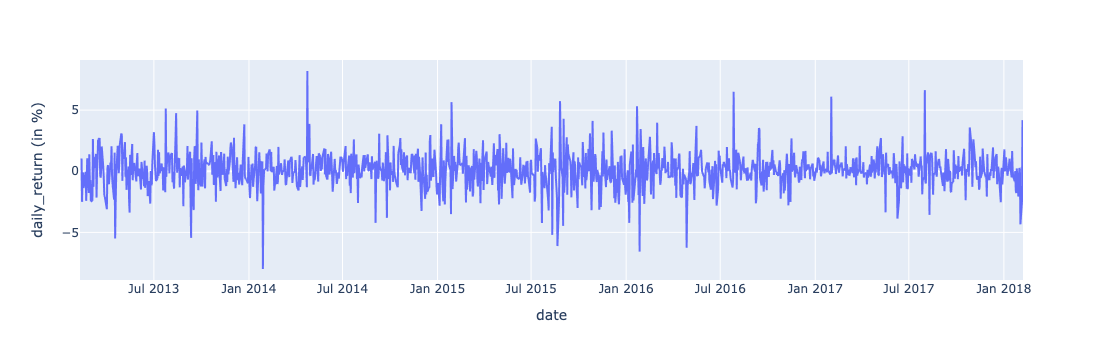

In [133]:
px.line(apple, x = 'date', y = 'daily_return (in %)')

### Resampling analysis of closing price

In [136]:
apple.dtypes

date                   datetime64[ns]
open                          float64
high                          float64
low                           float64
close                         float64
volume                          int64
Name                           object
daily_return                  float64
daily_return (in %)           float64
dtype: object

In [135]:
apple["date"] = pd.to_datetime(apple["date"])

In [137]:
apple.set_index('date', inplace = True)

<Axes: xlabel='date'>

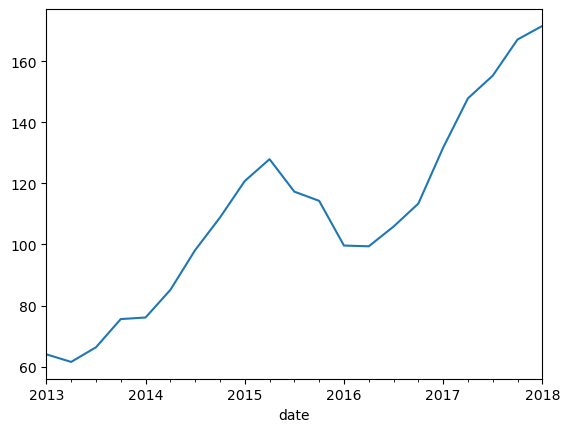

In [149]:
apple['close'].resample('QE').mean().plot()

### correlation of closing prices of top 4 tech giants

In [156]:
company_list

['/Users/akhilkumarkolli/individual_stocks_5yr/AMZN_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/AAPL_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/GOOG_data.csv',
 '/Users/akhilkumarkolli/individual_stocks_5yr/MSFT_data.csv']

In [160]:
amazon = pd.read_csv(company_list[0])
apple = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
microsoft = pd.read_csv(company_list[3])

In [172]:
com_closing_price = pd.DataFrame()

In [173]:
com_closing_price['AMZN_close'] = amazon['close']
com_closing_price['AAPL_close'] = apple['close']
com_closing_price['GOOG_close'] = google['close']
com_closing_price['MSFT_close'] = microsoft['close']

In [174]:
com_closing_price

AMZN_close  AAPL_close  GOOG_close  MSFT_close
0         261.95     67.8542      558.46       27.55
1         257.21     68.5614      559.99       27.86
2         258.70     66.8428      556.97       27.88
3         269.47     66.7156      567.16       28.03
4         269.24     66.6556      567.00       28.04
...          ...         ...         ...         ...
1254     1390.00    167.7800         NaN       94.26
1255     1429.95    160.5000         NaN       91.78
1256     1390.00    156.4900         NaN       88.00
1257     1442.84    163.0300         NaN       91.33
1258     1416.78    159.5400         NaN       89.61

[1259 rows x 4 columns]

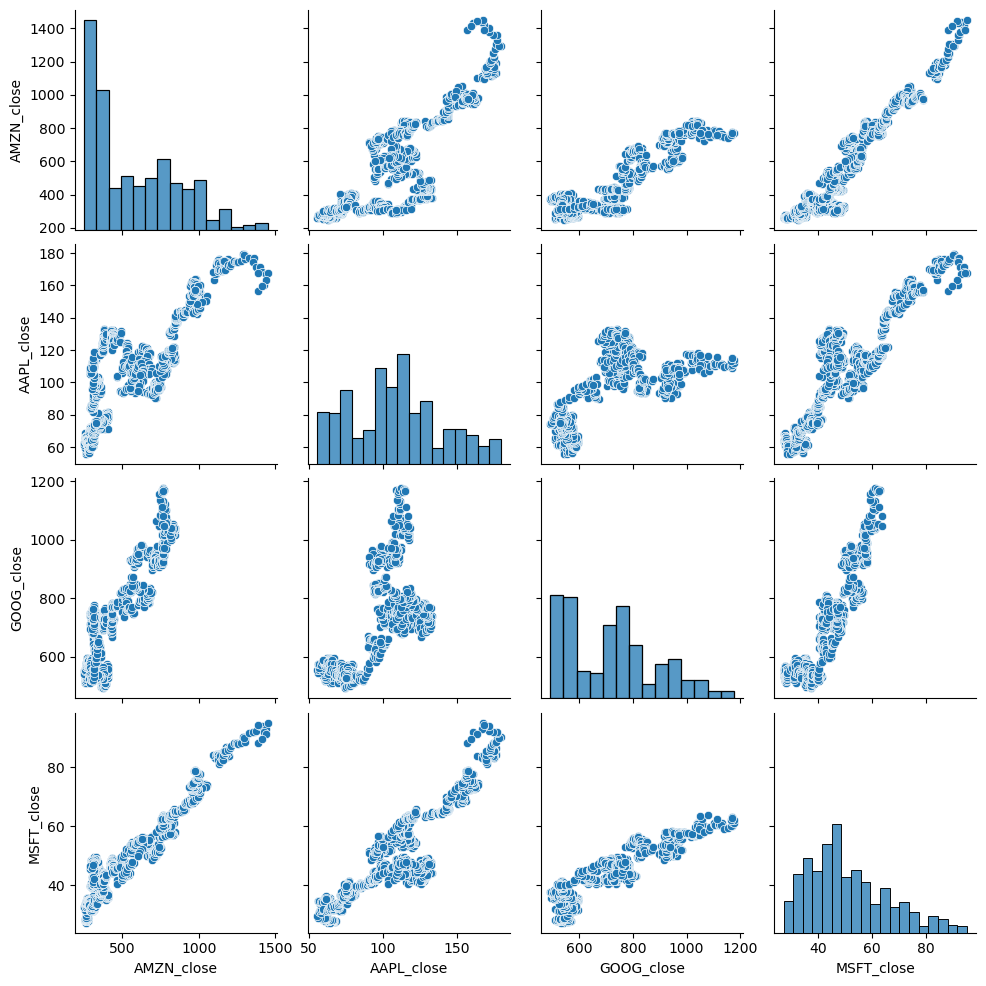

In [175]:
sns.pairplot(com_closing_price)

In [178]:
com_closing_price.corr()

AMZN_close  AAPL_close  GOOG_close  MSFT_close
AMZN_close    1.000000    0.819078    0.888456    0.955977
AAPL_close    0.819078    1.000000    0.640522    0.899689
GOOG_close    0.888456    0.640522    1.000000    0.907011
MSFT_close    0.955977    0.899689    0.907011    1.000000

<Axes: >

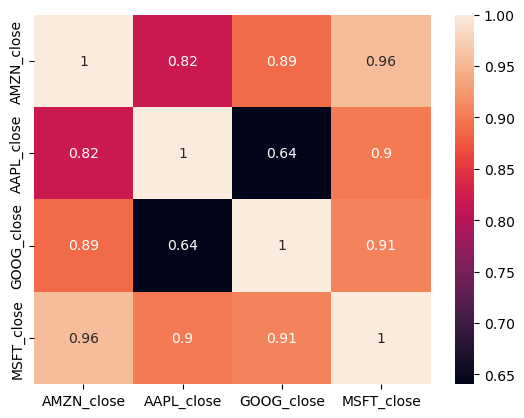

In [181]:
sns.heatmap(com_closing_price.corr(), annot=True)

### Amazon and Microsoft are correlated with each other

In [202]:
(com_closing_price['AMZN_close'] - com_closing_price['AMZN_close'].shift(1))/com_closing_price['AMZN_close'].shift(1) *100

In [209]:
com_closing_price.columns

Index(['AMZN_close', 'AAPL_close', 'GOOG_close', 'MSFT_close'], dtype='object')

In [219]:
for cols in com_closing_price.columns:
    com_closing_price[cols + '_pct_change'] = (com_closing_price[cols] - com_closing_price[cols].shift(1))/com_closing_price[cols].shift(1) *100

In [233]:
com_closing_price.columns

Index(['AMZN_close', 'AAPL_close', 'GOOG_close', 'MSFT_close',
       'AMZN_close_pct_change', 'AAPL_close_pct_change',
       'GOOG_close_pct_change', 'MSFT_close_pct_change'],
      dtype='object')

In [235]:
com_closing_var = com_closing_price[['AMZN_close_pct_change', 'AAPL_close_pct_change',
       'GOOG_close_pct_change', 'MSFT_close_pct_change']]

In [236]:
com_closing_var

AMZN_close_pct_change  AAPL_close_pct_change  GOOG_close_pct_change  \
0                       NaN                    NaN                    NaN   
1                 -1.809506               1.042235               0.273968   
2                  0.579293              -2.506658              -0.539295   
3                  4.163123              -0.190297               1.829542   
4                 -0.085353              -0.089934              -0.028211   
...                     ...                    ...                    ...   
1254              -4.196734               0.209043                    NaN   
1255               2.874101              -4.339015                    NaN   
1256              -2.793804              -2.498442                    NaN   
1257               3.801439               4.179181                    NaN   
1258              -1.806160              -2.140710                    NaN   

      MSFT_close_pct_change  
0                       NaN  
1                  1.125227  
2                  0.071788  
3                  0.538020  
4                  0.035676  
...                     ...  
1254              -0.789391  
1255              -2.631021  
1256              -4.118544  
1257               3.784091  
1258              -1.883280  

[1259 rows x 4 columns]

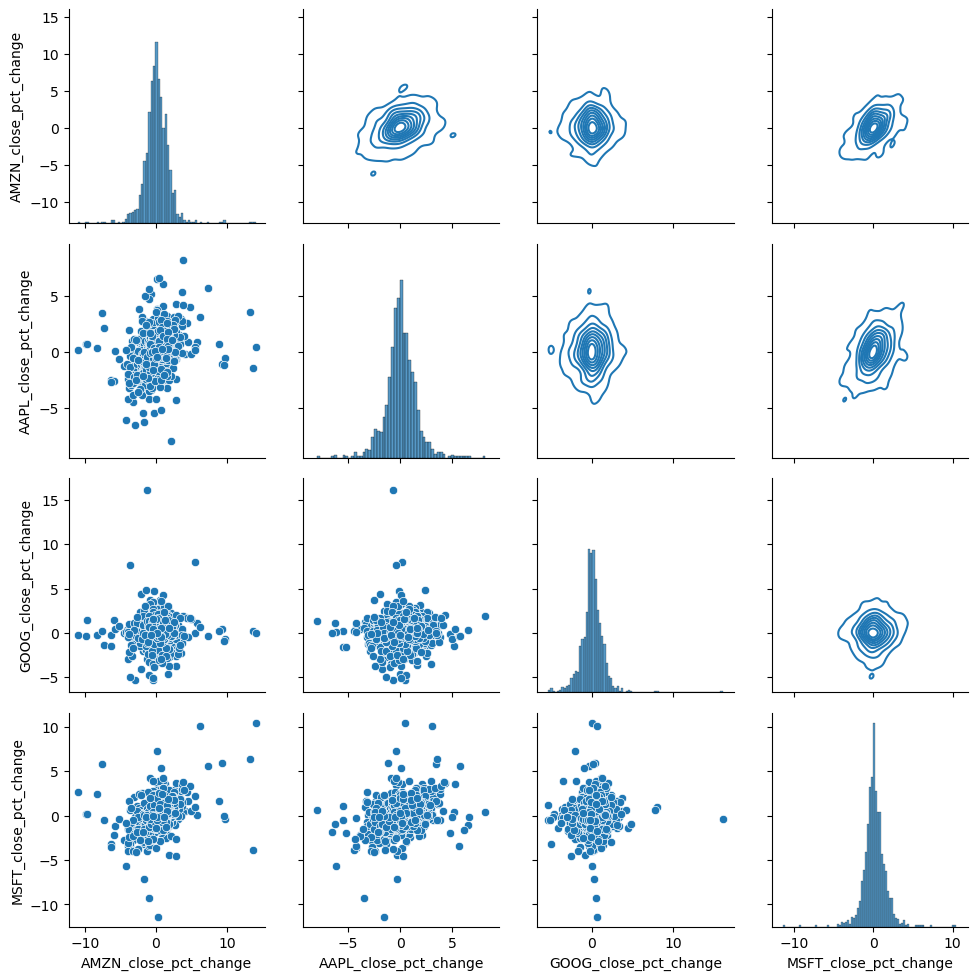

In [244]:
c = sns.PairGrid(data = com_closing_var)
c.map_diag(sns.histplot)
c.map_lower(sns.scatterplot)
c.map_upper(sns.kdeplot)

In [246]:
com_closing_var.corr()

AMZN_close_pct_change  AAPL_close_pct_change  \
AMZN_close_pct_change               1.000000               0.287659   
AAPL_close_pct_change               0.287659               1.000000   
GOOG_close_pct_change               0.027698               0.036202   
MSFT_close_pct_change               0.402678               0.366598   

                       GOOG_close_pct_change  MSFT_close_pct_change  
AMZN_close_pct_change               0.027698               0.402678  
AAPL_close_pct_change               0.036202               0.366598  
GOOG_close_pct_change               1.000000               0.038939  
MSFT_close_pct_change               0.038939               1.000000

### Conclusion : 
### It is clearly observed that there is correlation b/w Amazon and microsoft closing prices of stocks 